# HR ATTRITION

# Data Handling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
sns.set_theme(style='white', palette='deep')


import warnings
warnings.filterwarnings("ignore")

from kmodes.kmodes import KModes

In [2]:
attrition_data = pd.read_csv("IBM_HR-Attrition.csv")
attrition_data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


# Drop unnecessary columns

In [3]:
attrition_data.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours", "StockOptionLevel", "Department", "JobRole", "EducationField", "Education", "Over18"], inplace=True)

In [4]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   DistanceFromHome          1470 non-null   int64 
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   HourlyRate                1470 non-null   int64 
 8   JobInvolvement            1470 non-null   int64 
 9   JobLevel                  1470 non-null   int64 
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  MonthlyRate               1470 non-null   int64 
 14  NumCompaniesWorked      

In [5]:
attrition_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0


In [6]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# numeric and categorical columns
num_col = attrition_data.describe().columns.tolist()
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
# identify category columns
cat_col = attrition_data.describe(include="object").columns.tolist()
cat_col

['Attrition', 'BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime']

# Correlation

In [9]:
corr = attrition_data[num_col].corr()
corr

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,...,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,...,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,...,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,0.037600,-0.015297,-0.016322,0.039563,0.000644,0.034814,1.000000,...,-0.006429,-0.009811,-0.004085,0.026442,0.001467,0.007963,-0.023655,-0.012815,0.001567,-0.036746


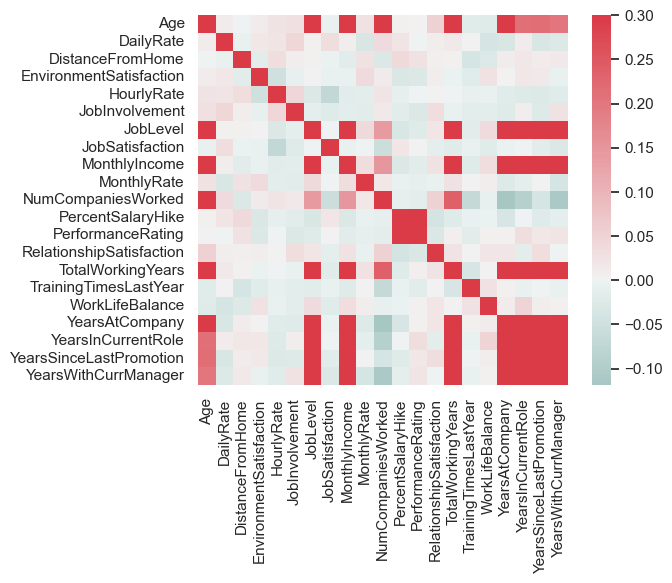

In [10]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True)
plt.show()

In [11]:
Attrition_Yes = attrition_data[attrition_data["Attrition"] == "Yes"]
Attrition_No = attrition_data[attrition_data["Attrition"] == "No"]
Attrition_Mean = pd.concat((Attrition_Yes.mean(numeric_only=True), Attrition_No.mean(numeric_only=True)), axis=1)
Attrition_Mean.columns = ["Yes","No"]
Attrition_Mean.round(2).style.background_gradient(cmap="Pastel1",axis=1)

,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000
JobSatisfaction,2.470000,2.780000
MonthlyIncome,4787.090000,6832.740000
MonthlyRate,14559.310000,14265.780000


# EXPLORATORY DATA ANALYSIS

In [12]:
colors = ['#eff3ff','#bdd7e7','#6baed6','#2171b5']
attrition_palette = {"Yes": "#0570b0", "No": '#bdc9e1'}
seq_palette = sns.light_palette(colors[-1], n_colors=len(colors), reverse=True, input='hex')
seq_palette.reverse()

font = {'size': 10}

# Attrition Count

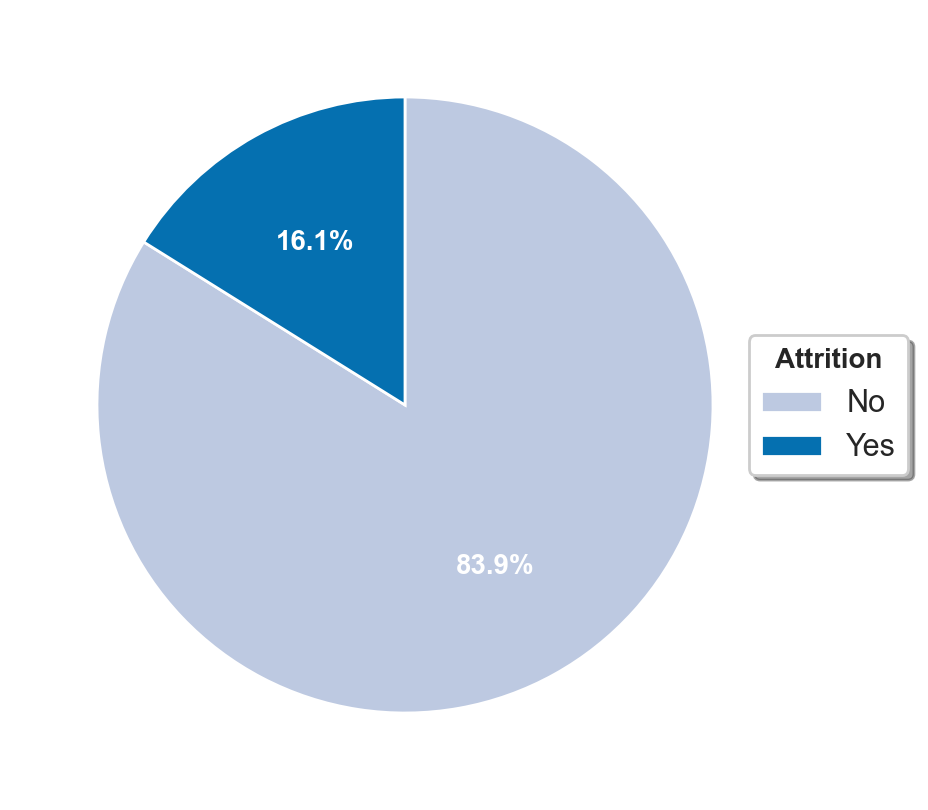

In [13]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=200)

colors = [attrition_palette[val] for val in ['No', 'Yes']]
wedges, _, labels = ax.pie(x=attrition_data['Attrition'].value_counts(), colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'fontsize': 10, 'color': 'white', 'fontweight': 'bold'})
plt.setp(labels, fontsize=10, fontweight='bold')

ax.legend(wedges, ['No', 'Yes'], title='Attrition', loc='center', bbox_to_anchor=(1.05, 0.5), fancybox=True, shadow=True, ncol=1)
plt.setp(ax.get_legend().get_title(), fontsize=10, fontweight='bold')

plt.show()

# Age

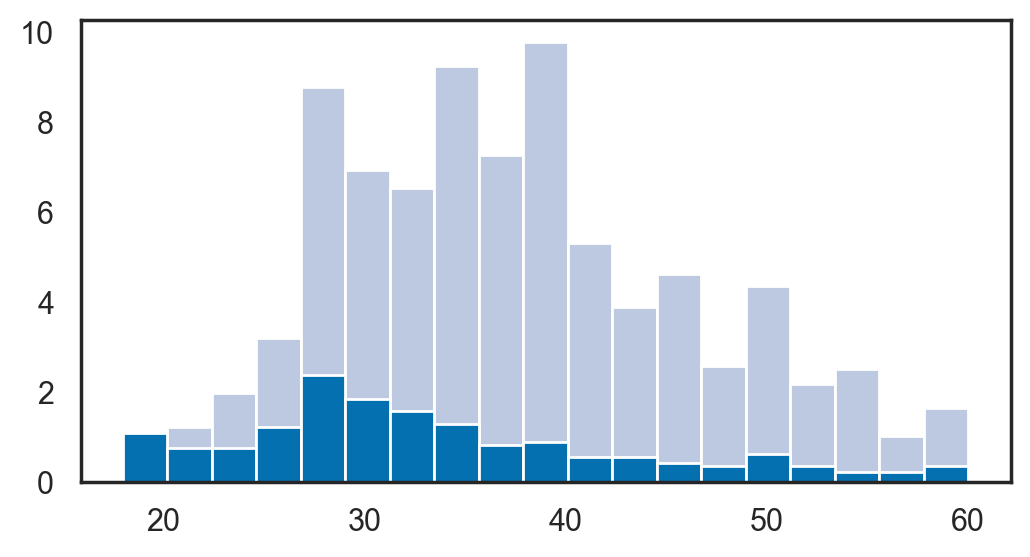

In [14]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, x="Age", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None)
plt.show()

# Gender

In [15]:
attrition_gender_data = attrition_data["Attrition"].groupby(attrition_data["Gender"]).value_counts(normalize=True)*100
attrition_gender_data

Gender  Attrition
Female  No           85.204082
        Yes          14.795918
Male    No           82.993197
        Yes          17.006803
Name: Attrition, dtype: float64

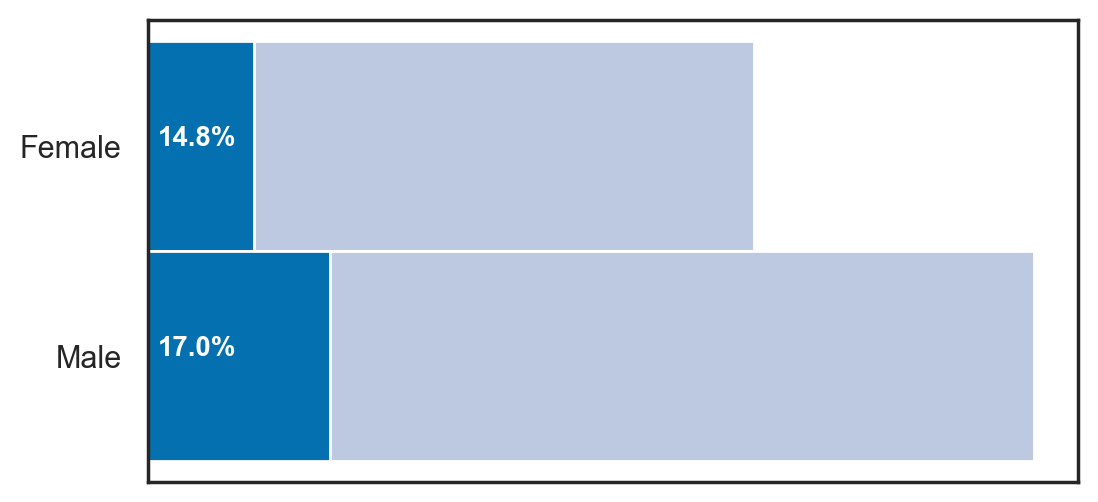

In [16]:
attrition_gender_data = attrition_data.groupby(['Gender', 'Attrition']).size().reset_index(name='Counts')
attrition_gender_data['Percentages'] = (attrition_gender_data['Counts'] / attrition_gender_data.groupby('Gender')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, y="Gender", hue="Attrition", palette=attrition_palette, alpha=1, legend=False).set(xlabel=None, ylabel=None, xticklabels=[])

for i, v in enumerate(attrition_data['Gender'].unique()):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_gender_data[(attrition_gender_data['Gender']==v) & (attrition_gender_data['Attrition']==attrition_value)]['Percentages'].values[0])
        ax.annotate(percentage, xy=(0.01, i+j/2), xycoords=ax.get_yaxis_transform(), fontsize=10, color='white', fontweight='bold')

plt.show()

# Marital Status

In [17]:
attrition_status_data = attrition_data["Attrition"].groupby(attrition_data["MaritalStatus"]).value_counts(normalize=True)*100
attrition_status_data

MaritalStatus  Attrition
Divorced       No           89.908257
               Yes          10.091743
Married        No           87.518574
               Yes          12.481426
Single         No           74.468085
               Yes          25.531915
Name: Attrition, dtype: float64

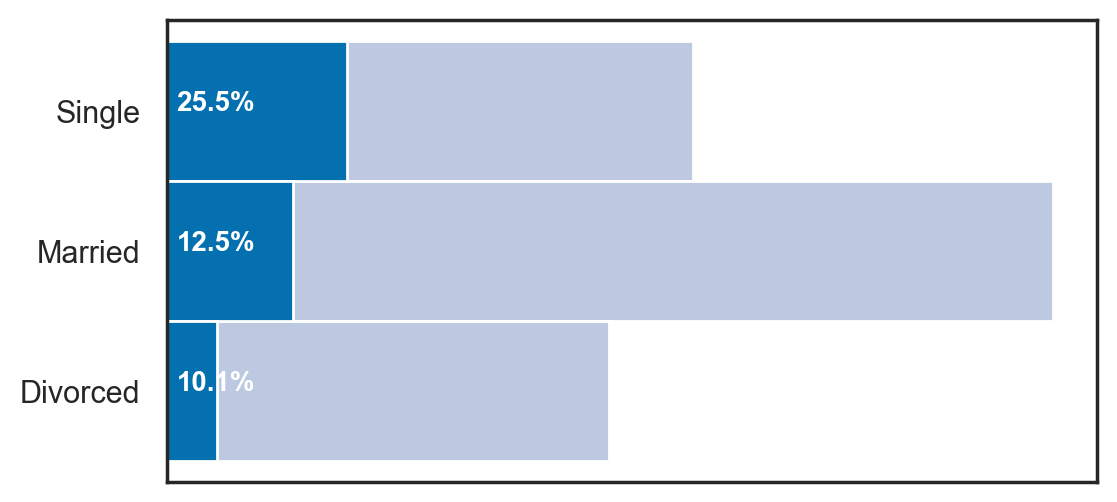

In [18]:
attrition_status_data = attrition_data.groupby(['MaritalStatus', 'Attrition']).size().reset_index(name='Counts')
attrition_status_data['Percentages'] = (attrition_status_data['Counts'] / attrition_status_data.groupby('MaritalStatus')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, y="MaritalStatus", hue="Attrition", palette=attrition_palette, alpha=1, legend=False).set(xlabel=None, ylabel=None, xticklabels=[])

for i, v in enumerate(attrition_data['MaritalStatus'].unique()):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_status_data[(attrition_status_data['MaritalStatus']==v) & (attrition_status_data['Attrition']==attrition_value)]['Percentages'].values[0])
        ax.annotate(percentage, xy=(0.01, i+j/2), xycoords=ax.get_yaxis_transform(), fontsize=10, color='white', fontweight='bold')

plt.show()

# Environment Satisfaction

In [19]:
attrition_environment_data = attrition_data["Attrition"].groupby(attrition_data["EnvironmentSatisfaction"]).value_counts(normalize=True)*100
attrition_environment_data

EnvironmentSatisfaction  Attrition
1                        No           74.647887
                         Yes          25.352113
2                        No           85.017422
                         Yes          14.982578
3                        No           86.313466
                         Yes          13.686534
4                        No           86.547085
                         Yes          13.452915
Name: Attrition, dtype: float64

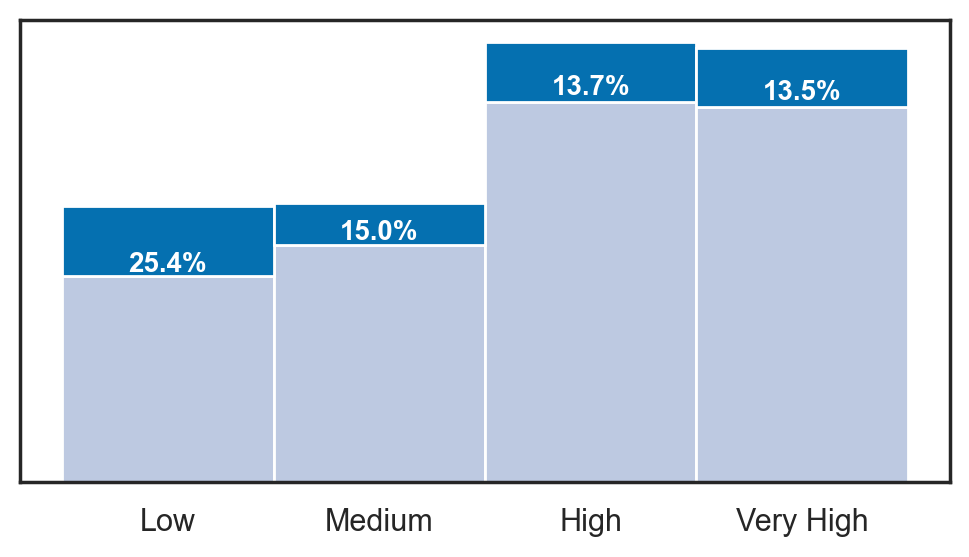

In [20]:
attrition_environment_data = attrition_data.groupby(['EnvironmentSatisfaction', 'Attrition']).size().reset_index(name='Counts')
attrition_environment_data['Percentages'] = (attrition_environment_data['Counts'] / attrition_environment_data.groupby('EnvironmentSatisfaction')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="EnvironmentSatisfaction", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binrange=(0.5, 4.5), binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=[])

env_sat_values = attrition_data['EnvironmentSatisfaction'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_environment_data[(attrition_environment_data['EnvironmentSatisfaction']==v) & (attrition_environment_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')

plt.xticks(ticks=[1, 2, 3, 4], labels=['Low', 'Medium', 'High', 'Very High'])
plt.show()

# Job Involvement

In [21]:
attrition_job_involvement_data = attrition_data["Attrition"].groupby(attrition_data["JobInvolvement"]).value_counts(normalize=True)*100
attrition_job_involvement_data

JobInvolvement  Attrition
1               No           66.265060
                Yes          33.734940
2               No           81.066667
                Yes          18.933333
3               No           85.599078
                Yes          14.400922
4               No           90.972222
                Yes           9.027778
Name: Attrition, dtype: float64

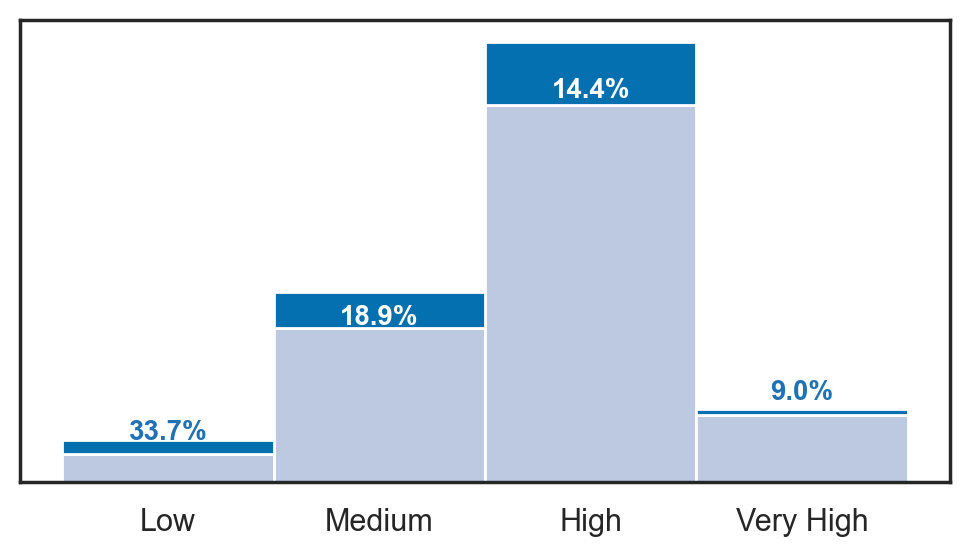

In [22]:
attrition_job_involvement_data = attrition_data.groupby(['JobInvolvement', 'Attrition']).size().reset_index(name='Counts')
attrition_job_involvement_data['Percentages'] = (attrition_job_involvement_data['Counts'] / attrition_job_involvement_data.groupby('JobInvolvement')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="JobInvolvement", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binrange=(0.5, 4.5), binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=[])

env_sat_values = attrition_data['JobInvolvement'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_job_involvement_data[(attrition_job_involvement_data['JobInvolvement']==v) & (attrition_job_involvement_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        if v == 1 or v == 4:
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='#2171b5', fontweight='bold', xytext=(0, 5), textcoords='offset points')
        else:
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')

plt.xticks(ticks=[1, 2, 3, 4], labels=['Low', 'Medium', 'High', 'Very High'])
plt.show()

# Job Satisfaction

In [23]:
attrition_job_satisfaction_data = attrition_data["Attrition"].groupby(attrition_data["JobSatisfaction"]).value_counts(normalize=True)*100
attrition_job_satisfaction_data

JobSatisfaction  Attrition
1                No           77.162630
                 Yes          22.837370
2                No           83.571429
                 Yes          16.428571
3                No           83.484163
                 Yes          16.515837
4                No           88.671024
                 Yes          11.328976
Name: Attrition, dtype: float64

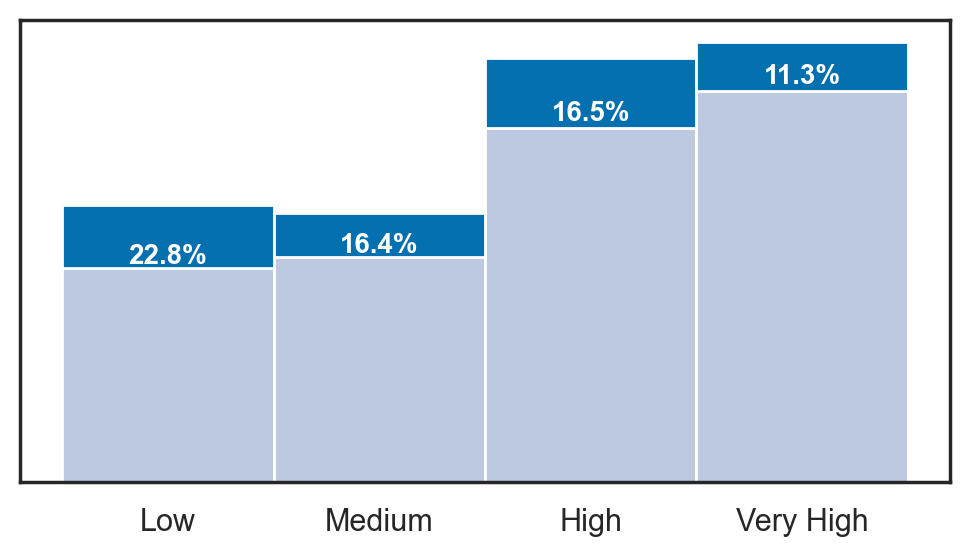

In [24]:
attrition_job_satisfaction_data = attrition_data.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Counts')
attrition_job_satisfaction_data['Percentages'] = (attrition_job_satisfaction_data['Counts'] / attrition_job_satisfaction_data.groupby('JobSatisfaction')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="JobSatisfaction", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binrange=(0.5, 4.5), binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=[])

env_sat_values = attrition_data['JobSatisfaction'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_job_satisfaction_data[(attrition_job_satisfaction_data['JobSatisfaction']==v) & (attrition_job_satisfaction_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')

plt.xticks(ticks=[1, 2, 3, 4], labels=['Low', 'Medium', 'High', 'Very High'])
plt.show()

# Travel

In [25]:
attrition_travel_data = attrition_data["Attrition"].groupby(attrition_data["BusinessTravel"]).value_counts(normalize=True)*100
attrition_travel_data

BusinessTravel     Attrition
Non-Travel         No           92.000000
                   Yes           8.000000
Travel_Frequently  No           75.090253
                   Yes          24.909747
Travel_Rarely      No           85.043145
                   Yes          14.956855
Name: Attrition, dtype: float64

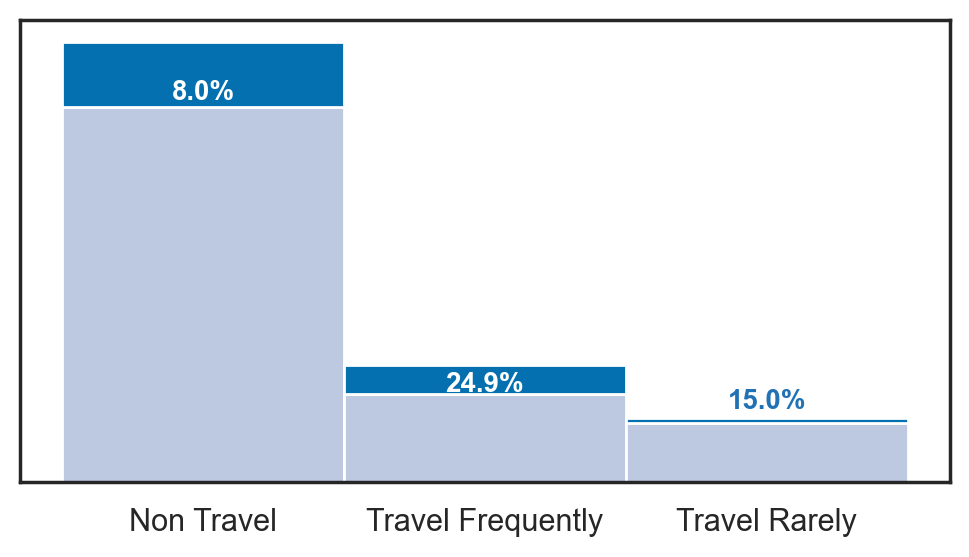

In [26]:
attrition_travel_data = attrition_data.groupby(['BusinessTravel', 'Attrition']).size().reset_index(name='Counts')
attrition_travel_data['Percentages'] = (attrition_travel_data['Counts'] / attrition_travel_data.groupby('BusinessTravel')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, x="BusinessTravel", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, multiple="stack", edgecolor='white', binwidth=1).set(xlabel=None, ylabel=None, xticklabels=['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], yticklabels=[])

env_sat_values = attrition_data['BusinessTravel'].unique()
env_sat_values.sort()

for i, v in enumerate(env_sat_values):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_travel_data[(attrition_travel_data['BusinessTravel']==v) & (attrition_travel_data['Attrition']==attrition_value)]['Percentages'].values[0])
        bar = ax.containers[j].get_children()[i]
        if v == "Travel_Rarely":
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='#2171b5', fontweight='bold', xytext=(0, 5), textcoords='offset points')
        else:
            ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()*1.02), ha='center', fontsize=10, color='white', fontweight='bold')

plt.xticks(ticks=[0,1,2], labels=['Non Travel', 'Travel Frequently', 'Travel Rarely'])
plt.show()

# Overtime

In [27]:
attrition_overtime_data = attrition_data["Attrition"].groupby(attrition_data["OverTime"]).value_counts(normalize=True)*100
attrition_overtime_data

OverTime  Attrition
No        No           89.563567
          Yes          10.436433
Yes       No           69.471154
          Yes          30.528846
Name: Attrition, dtype: float64

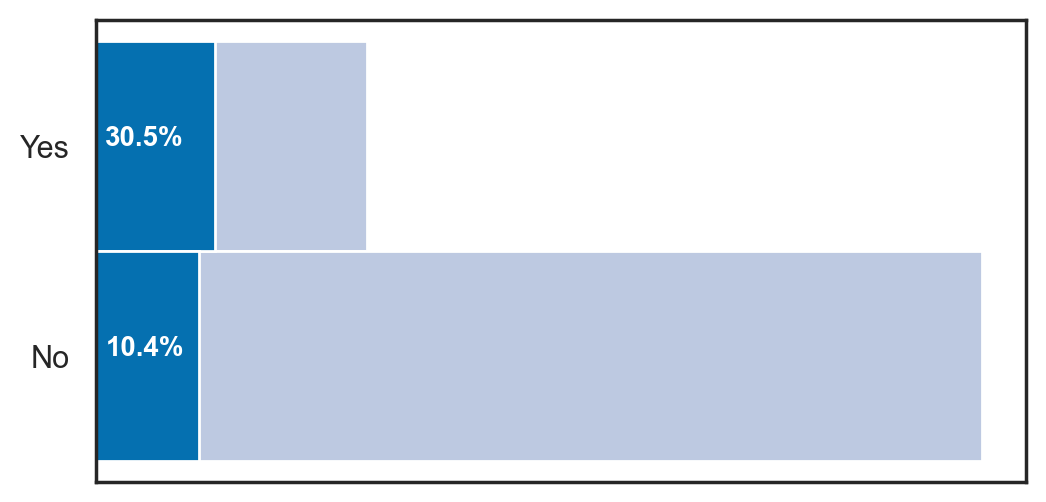

In [28]:
attrition_overtime_data = attrition_data.groupby(['OverTime', 'Attrition']).size().reset_index(name='Counts')
attrition_overtime_data['Percentages'] = (attrition_overtime_data['Counts'] / attrition_overtime_data.groupby('OverTime')['Counts'].transform('sum') * 100).round(1)

fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
sns.histplot(data=attrition_data, y="OverTime", hue="Attrition", palette=attrition_palette, alpha=1, legend=False).set(xlabel=None, ylabel=None, xticklabels=[])

for i, v in enumerate(attrition_data['OverTime'].unique()):
    for j, attrition_value in enumerate(['Yes']):
        percentage = '{:.1f}%'.format(attrition_overtime_data[(attrition_overtime_data['OverTime']==v) & (attrition_overtime_data['Attrition']==attrition_value)]['Percentages'].values[0])
        ax.annotate(percentage, xy=(0.01, i+j/2), xycoords=ax.get_yaxis_transform(), fontsize=10, color='white', fontweight='bold')
        
plt.show()

# Total Working Years

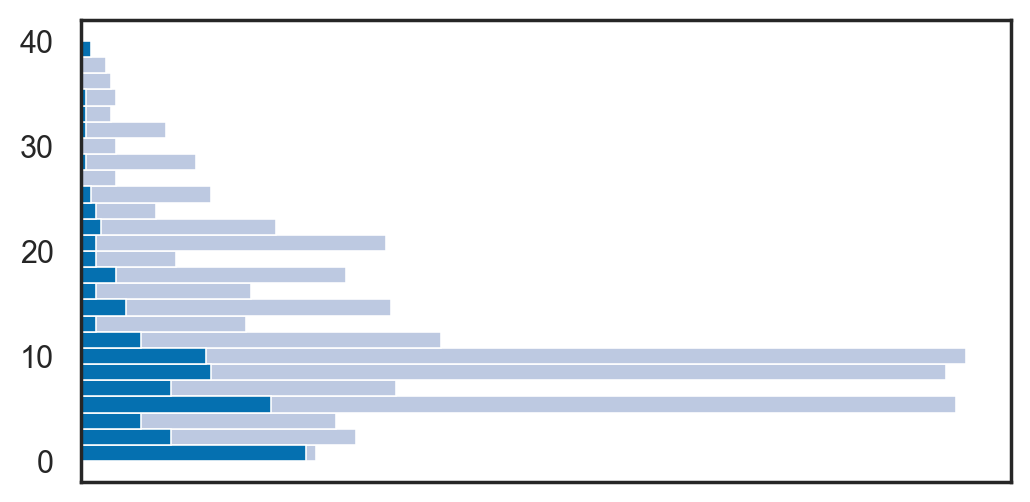

In [29]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, y="TotalWorkingYears", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None, xticklabels=[])
plt.show()

# Years at Company

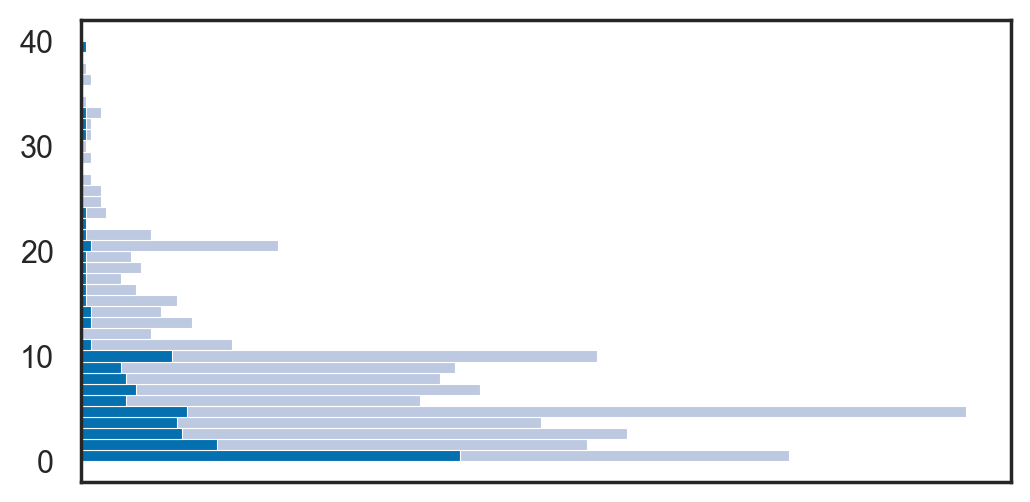

In [30]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, y="YearsAtCompany", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None, xticklabels=[])
plt.show()

# Years In Current Role

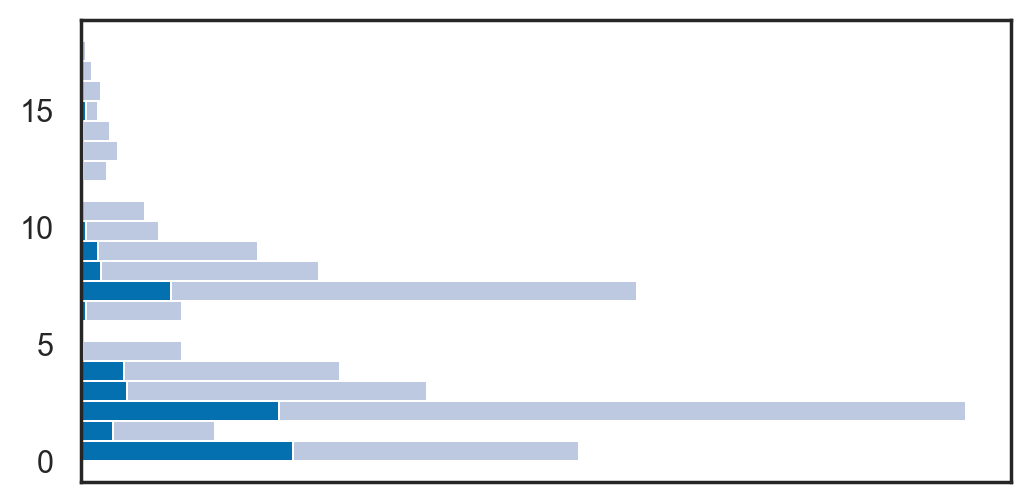

In [31]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, y="YearsInCurrentRole", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None, xticklabels=[])
plt.show()

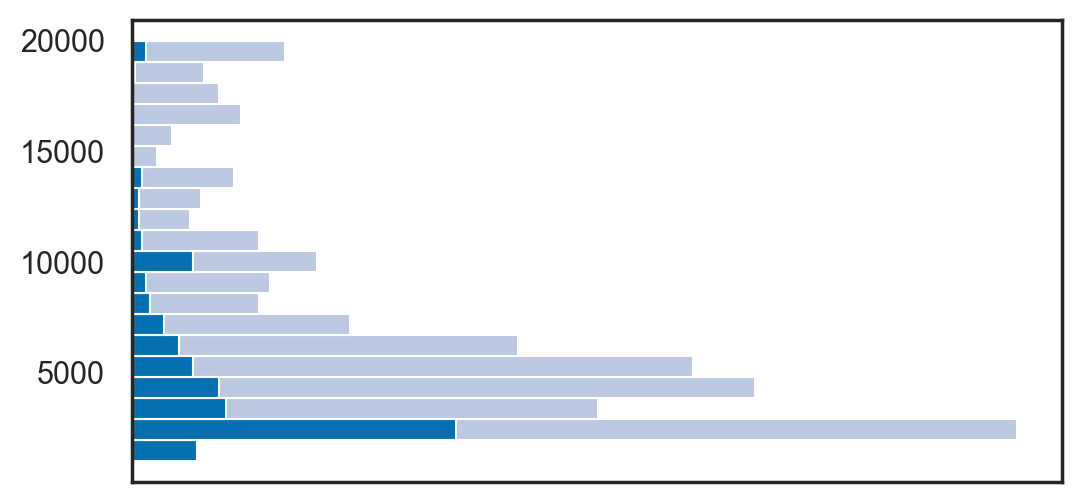

In [32]:
plt.figure(figsize=(6,3), dpi=200)
sns.histplot(data=attrition_data, y="MonthlyIncome", hue="Attrition", palette=attrition_palette, alpha=1, legend=False, stat='percent').set(xlabel=None, ylabel=None, xticklabels=[])
plt.show()

# Clustering

In [33]:
def run_kmodes(n_clusters=None, filtered_data_cluster=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(attrition_data)

  # Print intertia
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [34]:
cost_values = []

In [35]:
for k in range(1, 21):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    filtered_data_cluster=attrition_data
  )

  # Save cost to our container
  cost_values.append(cost)

Cost for n_clusters = 1: 25112.0
Cost for n_clusters = 2: 23804.0
Cost for n_clusters = 3: 23152.0
Cost for n_clusters = 4: 22812.0
Cost for n_clusters = 5: 22590.0
Cost for n_clusters = 6: 22398.0
Cost for n_clusters = 7: 22174.0
Cost for n_clusters = 8: 21996.0
Cost for n_clusters = 9: 21796.0
Cost for n_clusters = 10: 21687.0
Cost for n_clusters = 11: 21585.0
Cost for n_clusters = 12: 21478.0
Cost for n_clusters = 13: 21338.0
Cost for n_clusters = 14: 21282.0
Cost for n_clusters = 15: 21217.0
Cost for n_clusters = 16: 21144.0
Cost for n_clusters = 17: 21074.0
Cost for n_clusters = 18: 20986.0
Cost for n_clusters = 19: 20898.0
Cost for n_clusters = 20: 20830.0


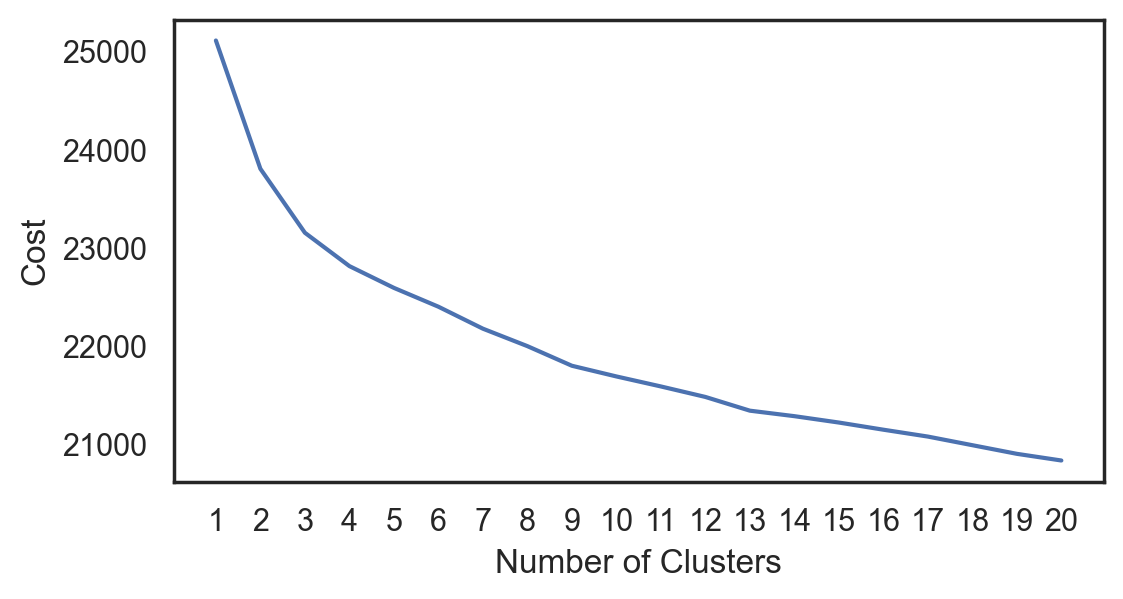

In [36]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 21), cost_values)

# Format plot
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [37]:
# Run our K-Modes function for n_clusters
cost, labels = run_kmodes(
  n_clusters=9,
  filtered_data_cluster=attrition_data
)

Cost for n_clusters = 9: 21796.0


In [38]:
attrition_data['labels']= labels
attrition_data

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,labels
0,41,Yes,Travel_Rarely,1102,1,2,Female,94,3,2,...,3,1,8,0,1,6,4,0,5,2
1,49,No,Travel_Frequently,279,8,3,Male,61,2,2,...,4,4,10,3,3,10,7,1,7,3
2,37,Yes,Travel_Rarely,1373,2,4,Male,92,2,1,...,3,2,7,3,3,0,0,0,0,2
3,33,No,Travel_Frequently,1392,3,4,Female,56,3,1,...,3,3,8,3,3,8,7,3,0,7
4,27,No,Travel_Rarely,591,2,1,Male,40,3,1,...,3,4,6,3,3,2,2,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,3,Male,41,4,2,...,3,3,17,3,3,5,2,0,3,5
1466,39,No,Travel_Rarely,613,6,4,Male,42,2,3,...,3,1,9,5,3,7,7,1,7,3
1467,27,No,Travel_Rarely,155,4,2,Male,87,4,2,...,4,2,6,0,3,6,2,0,3,5
1468,49,No,Travel_Frequently,1023,2,4,Male,63,2,2,...,3,4,17,3,2,9,6,0,8,6


In [39]:
attrition_data['labels'].value_counts().sort_index()

0    308
1    235
2    137
3    200
4    163
5    111
6    126
7     72
8    118
Name: labels, dtype: int64

In [40]:
attrition_data.groupby('labels').agg(pd.Series.mode)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
labels,,,,,,,,,,,,,,,,,,,,,
0,35,No,Travel_Rarely,1,4,Male,54,3,1,3,...,11,3,3,6,2,3,5,2,0,2
1,29,No,Travel_Rarely,1,4,Female,42,3,2,3,...,12,3,4,10,3,3,10,7,0,7
2,33,Yes,Travel_Rarely,1,4,Male,"[36, 98]",3,1,4,...,12,3,3,1,2,3,1,0,0,0
3,35,No,Travel_Rarely,2,3,Male,92,3,2,4,...,15,3,2,10,3,3,10,7,0,7
4,40,No,Travel_Rarely,2,3,Male,79,3,1,3,...,14,3,4,1,2,3,1,0,0,0
5,36,No,Travel_Rarely,2,2,Male,"[46, 60]",3,2,2,...,13,3,3,6,3,3,6,2,0,3
6,34,No,Travel_Rarely,1,4,Male,33,3,2,1,...,14,3,2,9,3,2,3,2,1,2
7,34,No,Travel_Rarely,7,4,Male,"[55, 58, 62, 77, 95]",3,1,3,...,11,3,3,10,3,3,7,7,0,7
8,31,No,Travel_Rarely,2,3,Male,86,3,1,4,...,13,3,4,6,3,3,2,2,2,2


In [43]:
clustered_data_1 = attrition_data.groupby('labels').agg(pd.Series.mode)

# Save Clustered Data
clustered_data_1.to_csv('clustered_data_1', index=False)

In [42]:
pd.set_option('display.max_columns', None)
clustered_data_1.head(9)

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
labels,,,,,,,,,,,,,,,,,,,,,,,,
0,35,No,Travel_Rarely,1,4,Male,54,3,1,3,Married,2610,1,No,11,3,3,6,2,3,5,2,0,2
1,29,No,Travel_Rarely,1,4,Female,42,3,2,3,Single,"[4011, 4148, 5228, 6811, 9980, 17328]",1,No,12,3,4,10,3,3,10,7,0,7
2,33,Yes,Travel_Rarely,1,4,Male,"[36, 98]",3,1,4,Single,"[2293, 2436, 2956]",1,Yes,12,3,3,1,2,3,1,0,0,0
3,35,No,Travel_Rarely,2,3,Male,92,3,2,4,Married,3407,1,No,15,3,2,10,3,3,10,7,0,7
4,40,No,Travel_Rarely,2,3,Male,79,3,1,3,Married,"[2028, 2500, 2703, 9824]",1,No,14,3,4,1,2,3,1,0,0,0
5,36,No,Travel_Rarely,2,2,Male,"[46, 60]",3,2,2,Single,"[2013, 2088, 2141, 2153, 2176, 2177, 2340, 234...",1,No,13,3,3,6,3,3,6,2,0,3
6,34,No,Travel_Rarely,1,4,Male,33,3,2,1,Married,"[2042, 5484, 5562]",1,No,14,3,2,9,3,2,3,2,1,2
7,34,No,Travel_Rarely,7,4,Male,"[55, 58, 62, 77, 95]",3,1,3,Divorced,2741,1,No,11,3,3,10,3,3,7,7,0,7
8,31,No,Travel_Rarely,2,3,Male,86,3,1,4,Married,2342,1,Yes,13,3,4,6,3,3,2,2,2,2
